# DATA ANALYSIS PROJECT


## Overview 

The goal of having a company that sells Movie tickets is to well, sell movie tickets. but how do we as consumers or customers know which particular movie ticket to purchase? clever people thought about rating the movies besed on previous watchers experience and the movie ticket sellers place this reviews along the movies so that we can know which movies on average people think are good and we can opt for that particular movie. so if a movie has a bad review, it simply implies that there would be low tickets sold for that movie, and which in turn produces low profits for the ticket selling company. the problem now arises, how well can you trust online reviews and ratings? *Especially* if the same company showing the rating *also* makes money by selling movie tickets. Do they have a bias towards rating movies higher than they should be rated?

## Goal

The goal of this project is to deduce though data analysis if a company's (in this case Fandango) ratings in 2015 had a bias towards rating movies better to sell more tickets.


## Understanding the Problem Background and available Data

### Problem Background

To have a better understanding of the Problem and how the data was collected Read this article: [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)


### The Data

The data is openly available on 538's github: https://github.com/fivethirtyeight/data. There are two csv files, one with Fandango Stars and Displayed Ratings, and the other with aggregate data for movie ratings from other sites, like Metacritic,IMDB, and Rotten Tomatoes.

#### all_sites_scores.csv
#### fandango_scape.csv



#### all_sites_scores.csv 
this file contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

----
----

#### fandango_scrape.csv
this file contains every film 538 pulled from Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

### first step is to import the libraries that would be needed for data analysis and visualization

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# read in the files that we want to analize
fandango_data = pd.read_csv("fandango_scrape.csv")
all_sites_data = pd.read_csv("all_sites_scores.csv")

#### now that we have both the ratings from fandango and other sites we can begin the analysis starting with fandango's data to understand the relationship between features 

In [51]:
fandango_data.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [52]:
fandango_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


according to the providers of the data the **RATING** feature are actual ratings from people and the **STARS** feature are the visual representation of those ratings when rounded up on the fandango's website. lets start the analysis of this data by exploring the relationship between those 2 features

#### since we are interested in data that has ratings and stars we can check to see if there are some data that have null or 0 values. since they are not useful for the analysis we can remove them 


In [53]:
fandango_data = fandango_data[fandango_data["VOTES"]>0]

In [54]:
fandango_data.corr(numeric_only=True)

,STARS,RATING,VOTES
STARS,1.000000,0.971064,0.133843
RATING,0.971064,1.000000,0.130837
VOTES,0.133843,0.130837,1.000000


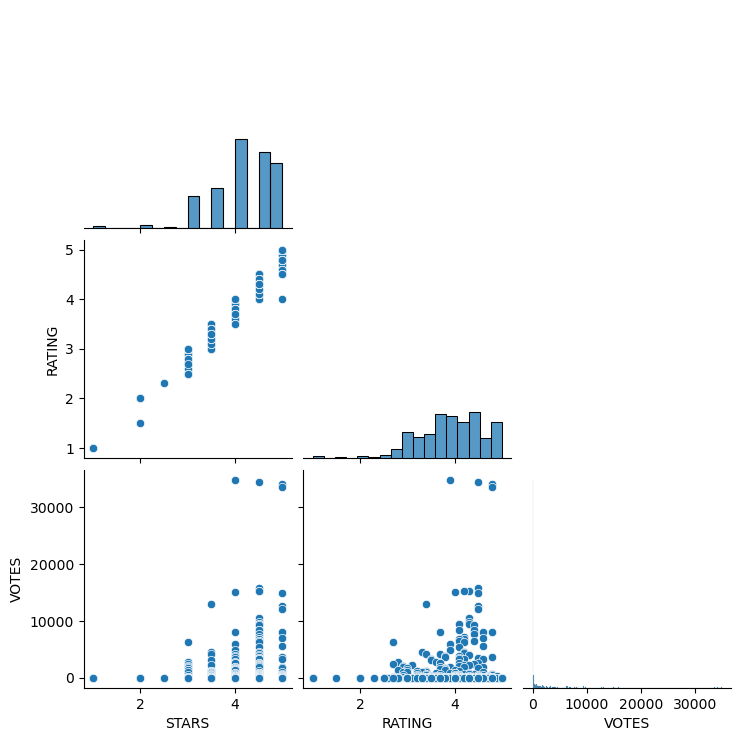

In [55]:
# we can use a scatter plot to visualize trends and relationships between features
# single relationships could be visualized using a scatter plot
# sns.scatterplot(data=fandango_data, x="RATING", y="VOTES")
# since this is a relatively small dataset,a pairplot could be used to see all relationships between all features.
sns.pairplot(data=fandango_data, corner=True)

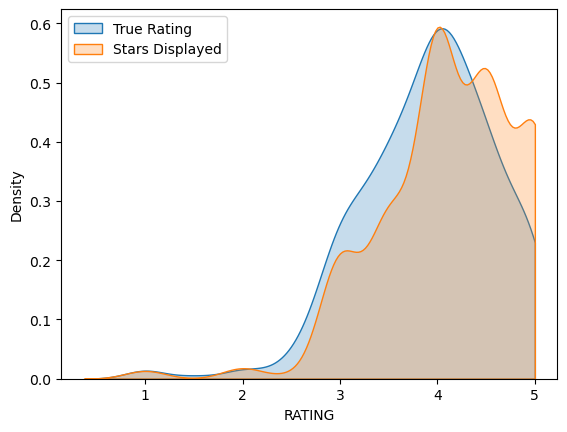

In [42]:

sns.kdeplot(data=fandango_data,x='RATING',clip=[0,5],fill=True,label='True Rating')
sns.kdeplot(data=fandango_data,x='STARS',clip=[0,5],fill=True,label='Stars Displayed')

plt.legend(loc=(2))

#### from the above visualizations we can already tell that the stars displayed on the fandango website are a bit higher than the actual reviews but this can be excused because the we know that a round up is done before the ratings are converted to stars. we can investigate this further by checking the diffrence between the true ratings and the star ratings and also by checking how manytimes the diffrence occurs. 

<Axes: xlabel='REVIEW_DIFF', ylabel='count'>

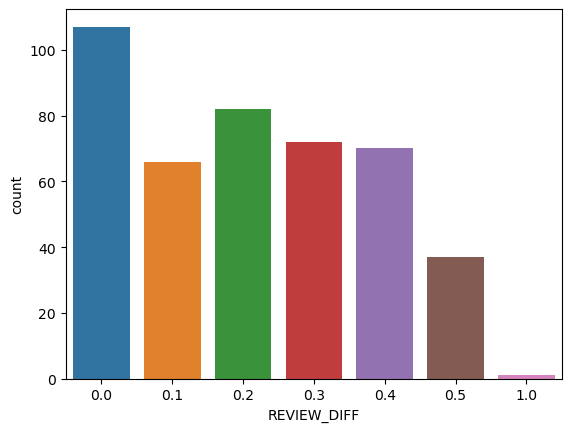

In [56]:
fandango_data["REVIEW_DIFF"] = fandango_data["STARS"] - fandango_data["RATING"] 
fandango_data["REVIEW_DIFF"] = fandango_data["REVIEW_DIFF"].round(2)
sns.countplot(data=fandango_data, x="REVIEW_DIFF")

#### this visualization above shows that there are lots movies that have a diffrences between the actual review and the stars shown, 1 movie stands out in particular, lets see what data it is

In [46]:
fandango_data[fandango_data["REVIEW_DIFF"]==1]

,FILM,STARS,RATING,VOTES,REVIEW_DIFF
381,Turbo Kid (2015),5.0,4.0,2,1.0


#### in the above data, we notice that the movie had an average rating of 4 from 2 uers but 5 was shown on the website. the diffrence of 1 is alarming considering our scale only runs from 1-5

#### now we can move from comparing fandango's displayed ratings from true ratings to comparing Fandango's Ratings to other sites ratings

#### the all_site_data has reviews from ROTTEN TOMATOES, IMDB, METACRITIC etc lets explore the relationships that exists between these other reviews themselves

### ROTTEN TOMATOES REVIEWS

In [48]:
all_sites_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


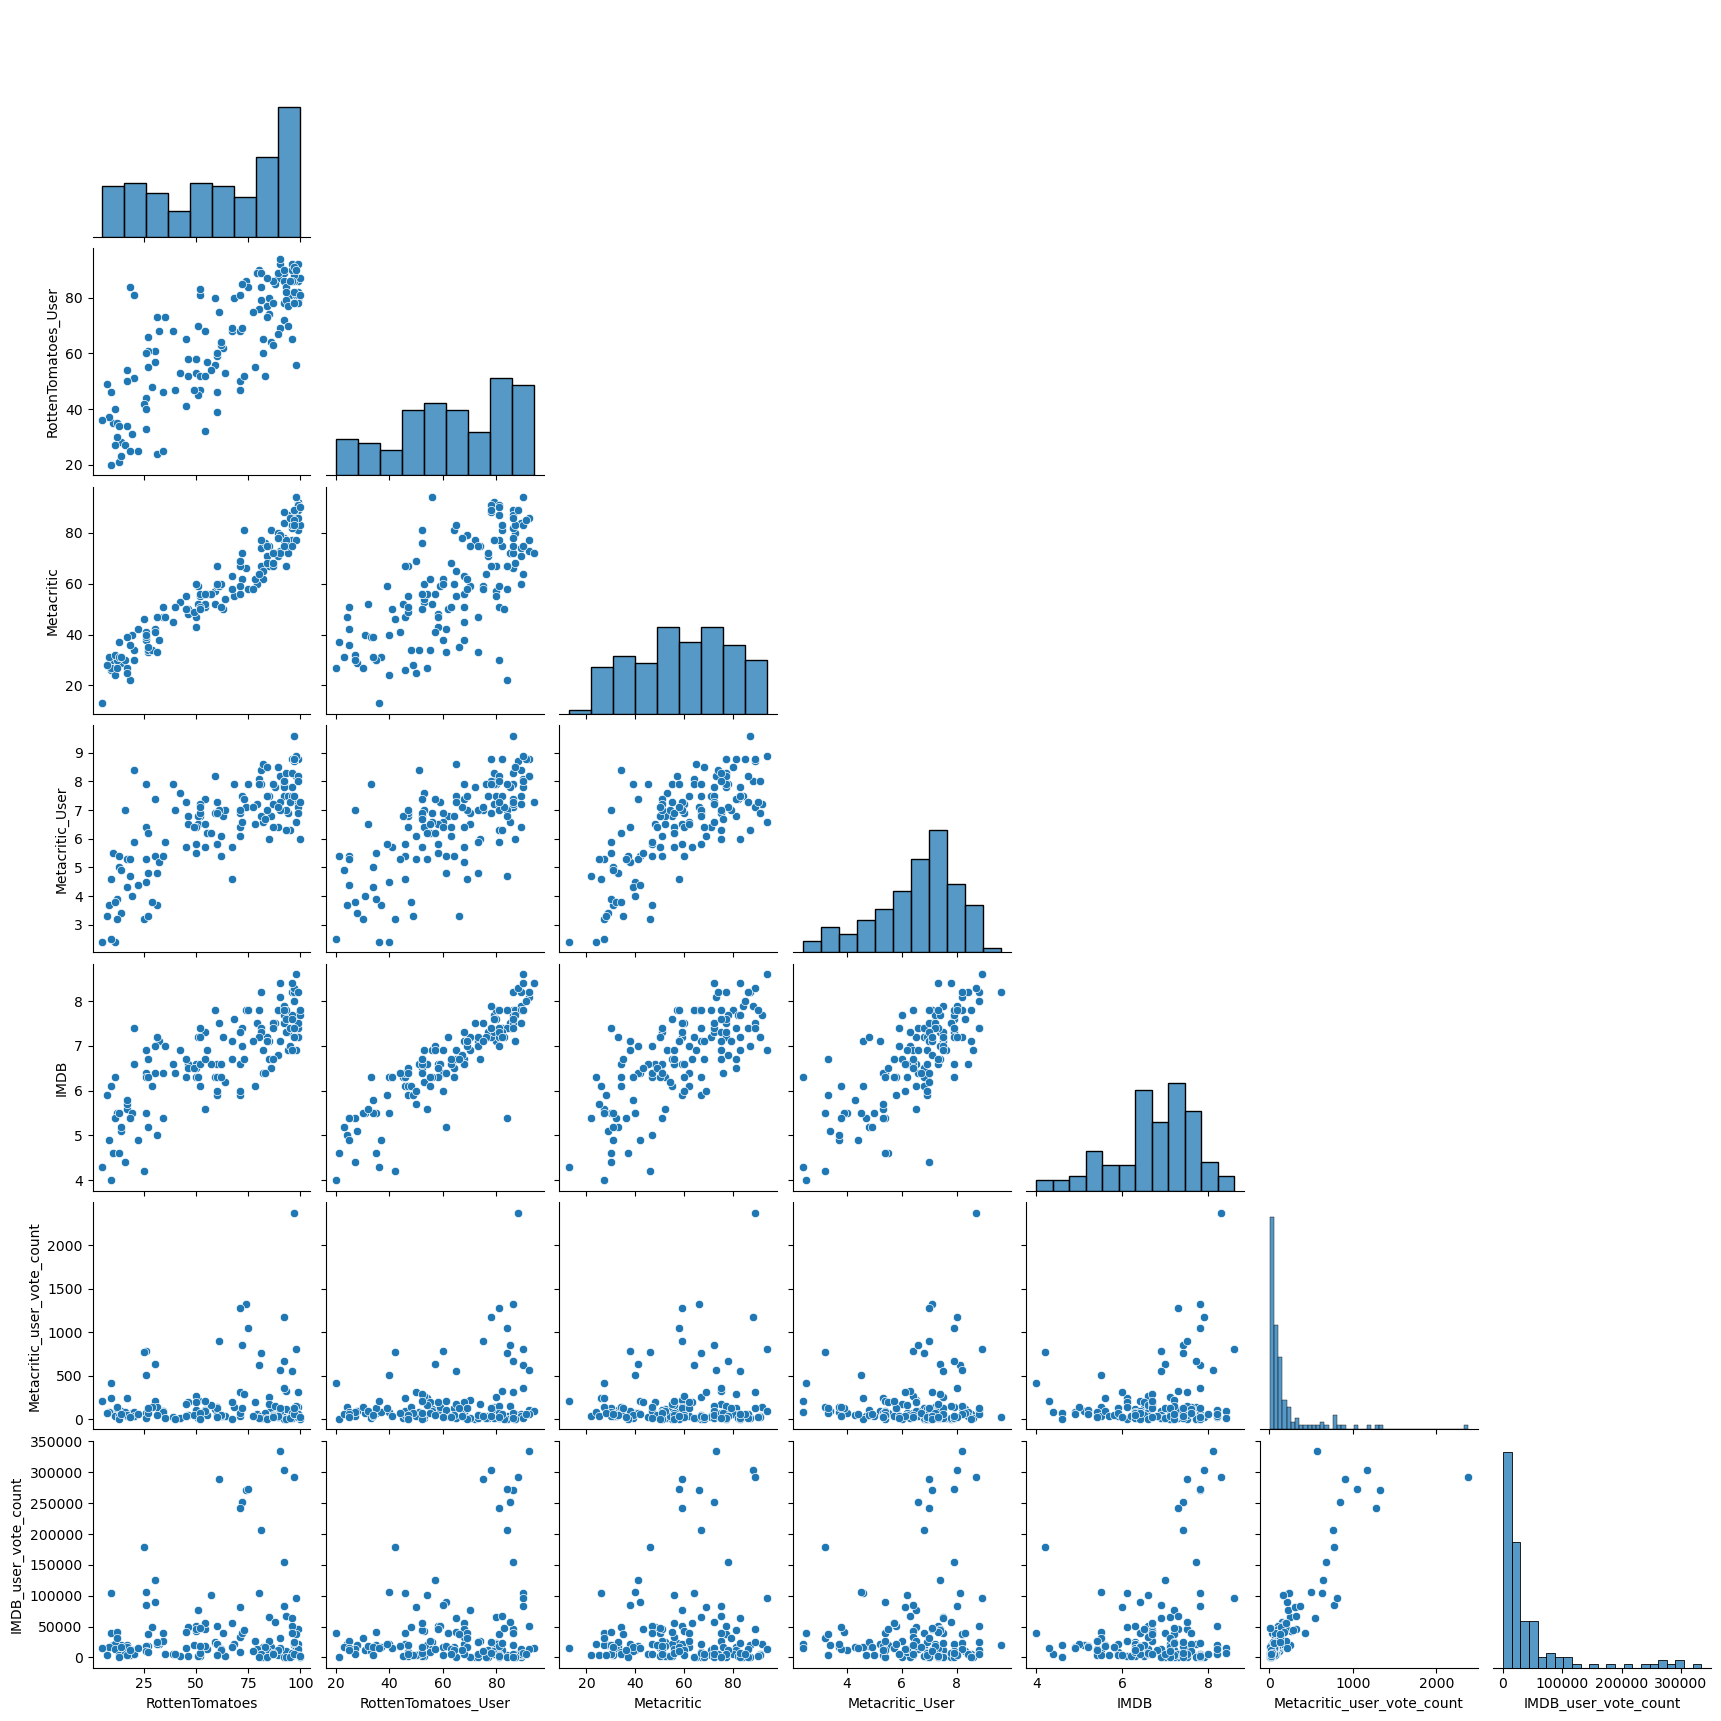

In [60]:
# because this data set has much more features it might be best to visualize relationships individually rather than using the pair plot
# sns.scatterplot(data=all_sites_data, x="RottenTomatoes", y="RottenTomatoes_User")
sns.pairplot(data=all_sites_data, corner=True)

#### from the data above we can perfom varous analysis to answer some questions like
What movie has the highest IMDB user vote count?


In [64]:
all_sites_data.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164


In [65]:
all_sites_data.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023


In [68]:
# for this we would need the diffrence between the critics and the users (rotten tomatoes)
all_sites_data["Rotten_Ratings_Diff"]  = all_sites_data["RottenTomatoes"] - all_sites_data["RottenTomatoes_User"]
print("Users Love but Critics Hate")
all_sites_data.nsmallest(5,"Rotten_Ratings_Diff")[["FILM","Rotten_Ratings_Diff"]]

Users Love but Critics Hate


,FILM,Rotten_Ratings_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


In [69]:
all_sites_data.nlargest(5,"Rotten_Ratings_Diff")[["FILM","Rotten_Ratings_Diff"]]

,FILM,Rotten_Ratings_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


### Fandago Scores vs. All Sites

#### To know if Fandangos ratings for movies are actually higher than other ratings on other platforms we can combine both datasets and analyse all the data together.

Not every movie in the Fandango table is in the All Sites table, We only want to compare movies that are in both DataFrames, we can use inner merge to merge together both DataFrames based on the **FILM** columns.

In [71]:
combined_ratings_data = pd.merge(fandango_data,all_sites_data,on='FILM',how='inner')

In [73]:
combined_ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   REVIEW_DIFF                 145 non-null    float64
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Ratings_Diff         145 non-null    int64  
dtypes: float64(5), int64(7), object(1)


In [72]:
combined_ratings_data.head()

,FILM,STARS,RATING,VOTES,REVIEW_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Ratings_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,0.1,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,0.0,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,0.2,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,0.2,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,0.0,98,90,94,8.9,8.6,807,96252,8


In [118]:
combined_ratings_data[["STARS", "RATING","RottenTomatoes", "RottenTomatoes_User", "Metacritic", "Metacritic_User", "IMDB", "FILM"]]

,STARS,RATING,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,FILM
0,4.0,3.9,25,42,46,3.2,4.2,Fifty Shades of Grey (2015)
1,4.5,4.5,71,81,59,7.0,7.3,Jurassic World (2015)
2,5.0,4.8,72,85,72,6.6,7.4,American Sniper (2015)
3,5.0,4.8,81,84,67,6.8,7.4,Furious 7 (2015)
4,4.5,4.5,98,90,94,8.9,8.6,Inside Out (2015)
...,...,...,...,...,...,...,...,...
140,3.5,3.5,87,63,68,6.4,6.7,"Kumiko, The Treasure Hunter (2015)"
141,4.0,3.6,95,81,87,6.3,7.0,The Diary of a Teenage Girl (2015)
142,4.5,4.2,93,84,67,7.0,7.8,The Wrecking Crew (2015)
143,4.0,3.9,95,86,86,7.3,7.4,Tangerine (2015)


Notice that RT,Metacritic, and IMDB don't use a score between 0-5 stars like Fandango does. In order to do a fair comparison, we need to either **scale** or **normalize** these values so they all fall between 0-5 stars and the relationship between reviews stays the same.
this can be done with various methods, but i chose to normalize the ther values down to 5.
if the value is in the 100 scale, i simply divide by 20 to get 5
if the value is in the 10 scale, i divide by 2 to get 5. 

In [80]:
combined_ratings_data['RT_Norm'] = np.round(combined_ratings_data['RottenTomatoes']/20,1)
combined_ratings_data['RTU_Norm'] =  np.round(combined_ratings_data['RottenTomatoes_User']/20,1)
combined_ratings_data['Meta_Norm'] =  np.round(combined_ratings_data['Metacritic']/20,1)
combined_ratings_data['Meta_U_Norm'] =  np.round(combined_ratings_data['Metacritic_User']/2,1)
combined_ratings_data['IMDB_Norm'] = np.round(combined_ratings_data['IMDB']/2,1)

In [81]:
combined_ratings_data.head()

,FILM,STARS,RATING,VOTES,REVIEW_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Ratings_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,0.1,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,0.0,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,0.2,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,0.2,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,0.0,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


looking at the dataset we now have all the ratings from other sites on the same movie and on the same scale, we can seperate those features out into a new dataset and commerce our analysis

In [121]:
combined_ratings_norm_data = combined_ratings_data[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm',"FILM"]]

In [122]:
combined_ratings_norm_data.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1,Fifty Shades of Grey (2015)
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6,Jurassic World (2015)
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7,American Sniper (2015)
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7,Furious 7 (2015)
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3,Inside Out (2015)


Does Fandango display abnormally high ratings? We already know it pushs displayed RATING higher than STARS, but are the ratings themselves higher than average in comparison to other sites?
we can answer this questions by Createing a plot comparing the distributions of normalized ratings across all sites. 

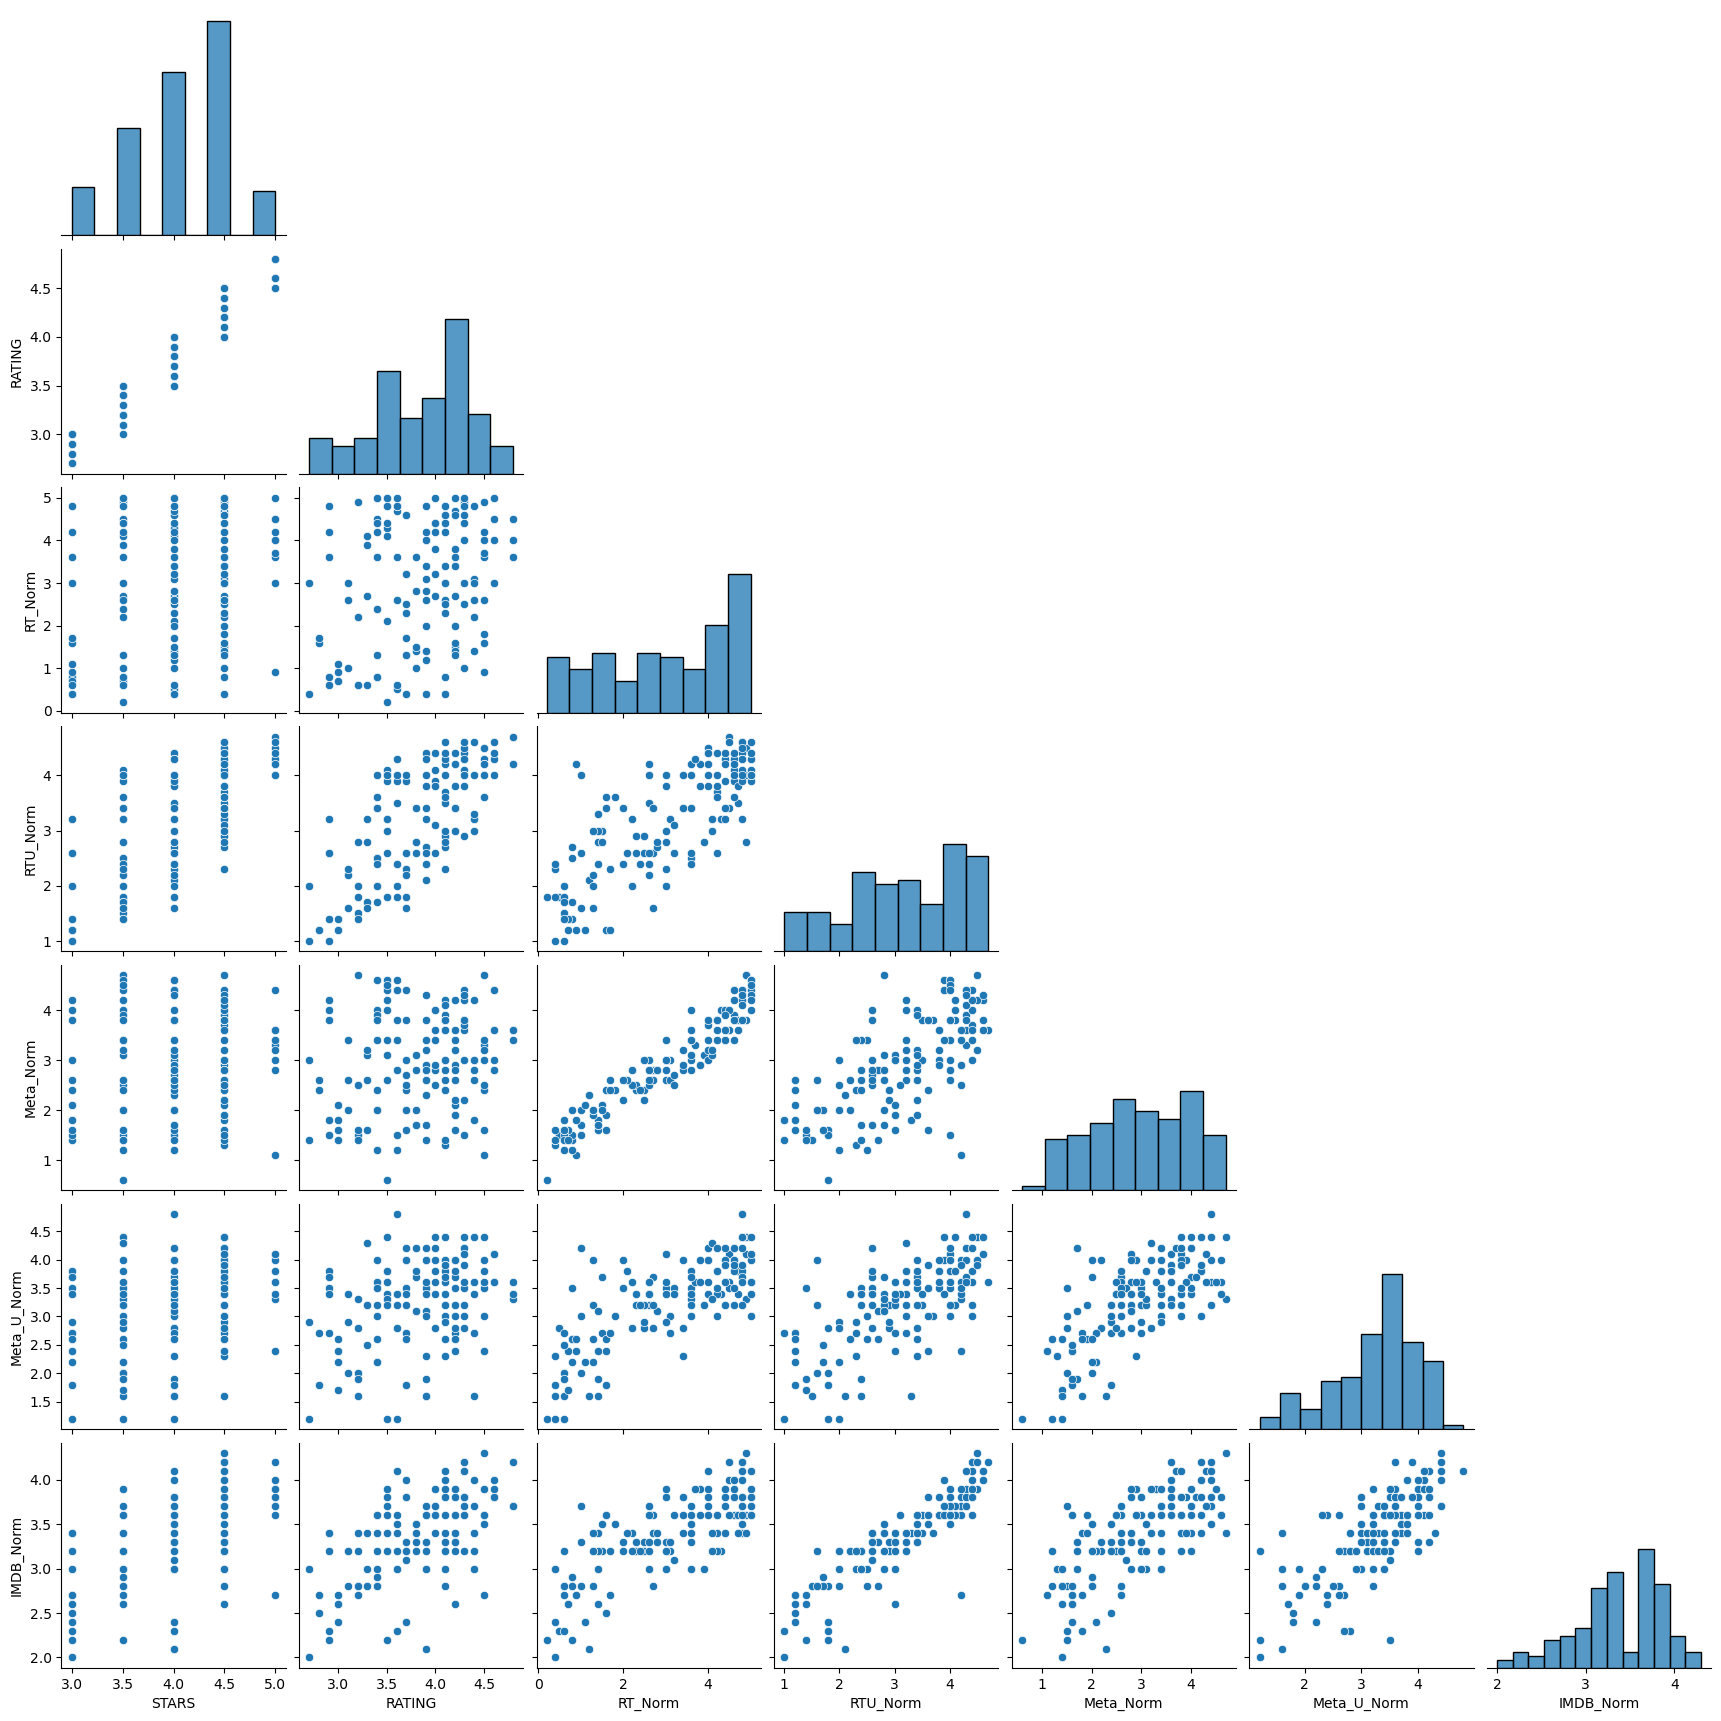

In [85]:
sns.pairplot(data=combined_ratings_norm_data, corner=True)

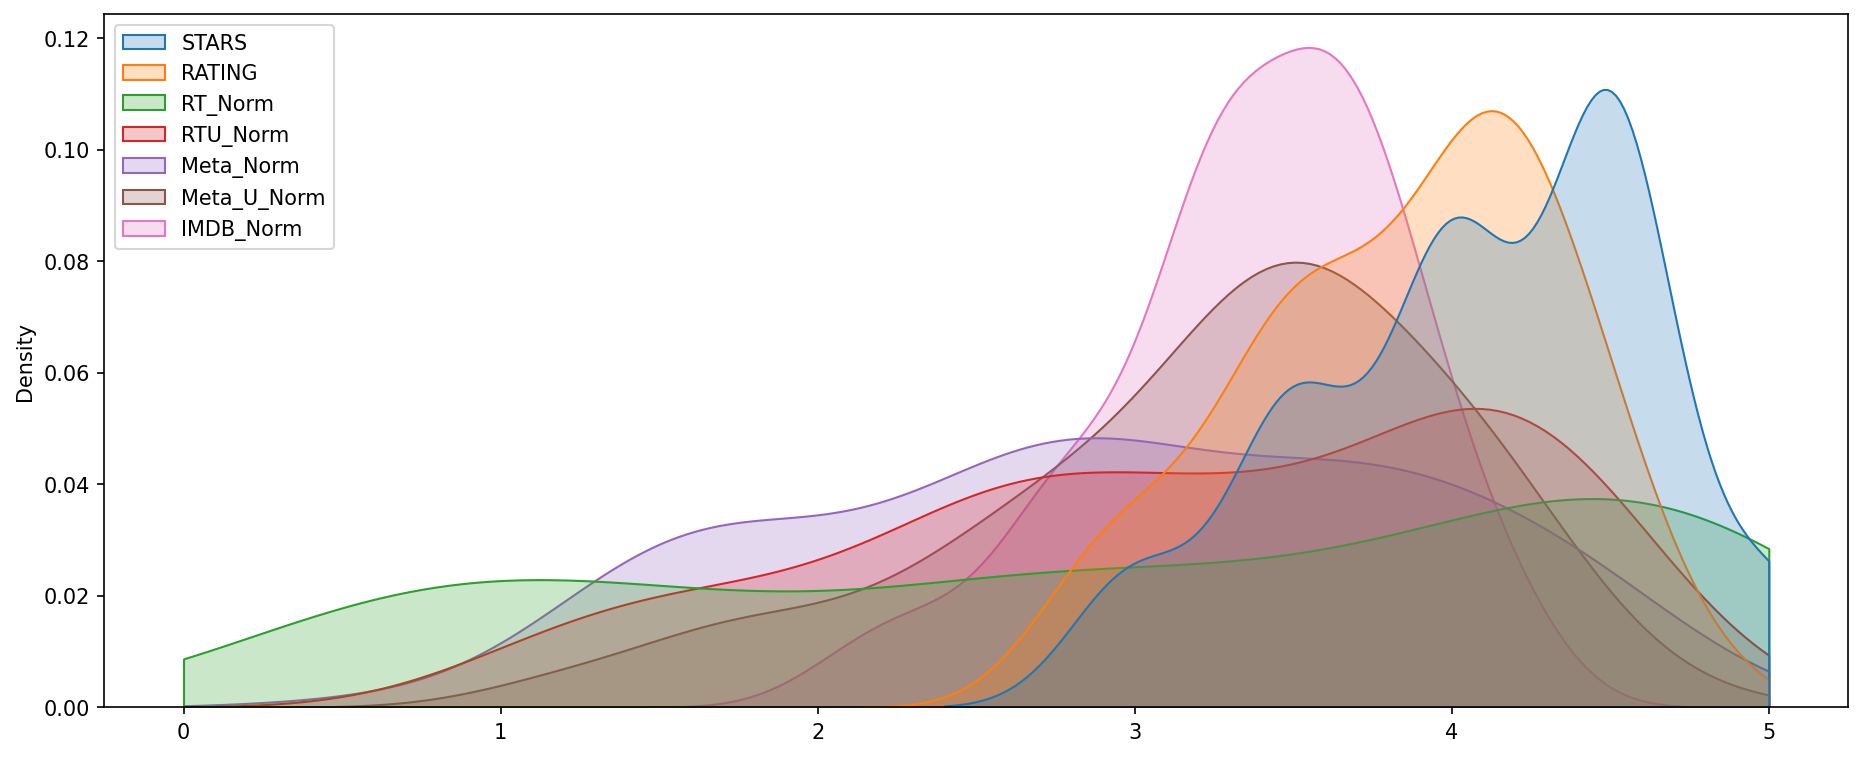

In [107]:
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=combined_ratings_norm_data, clip=[0,5], fill=True)
sns.move_legend(ax, "upper left")

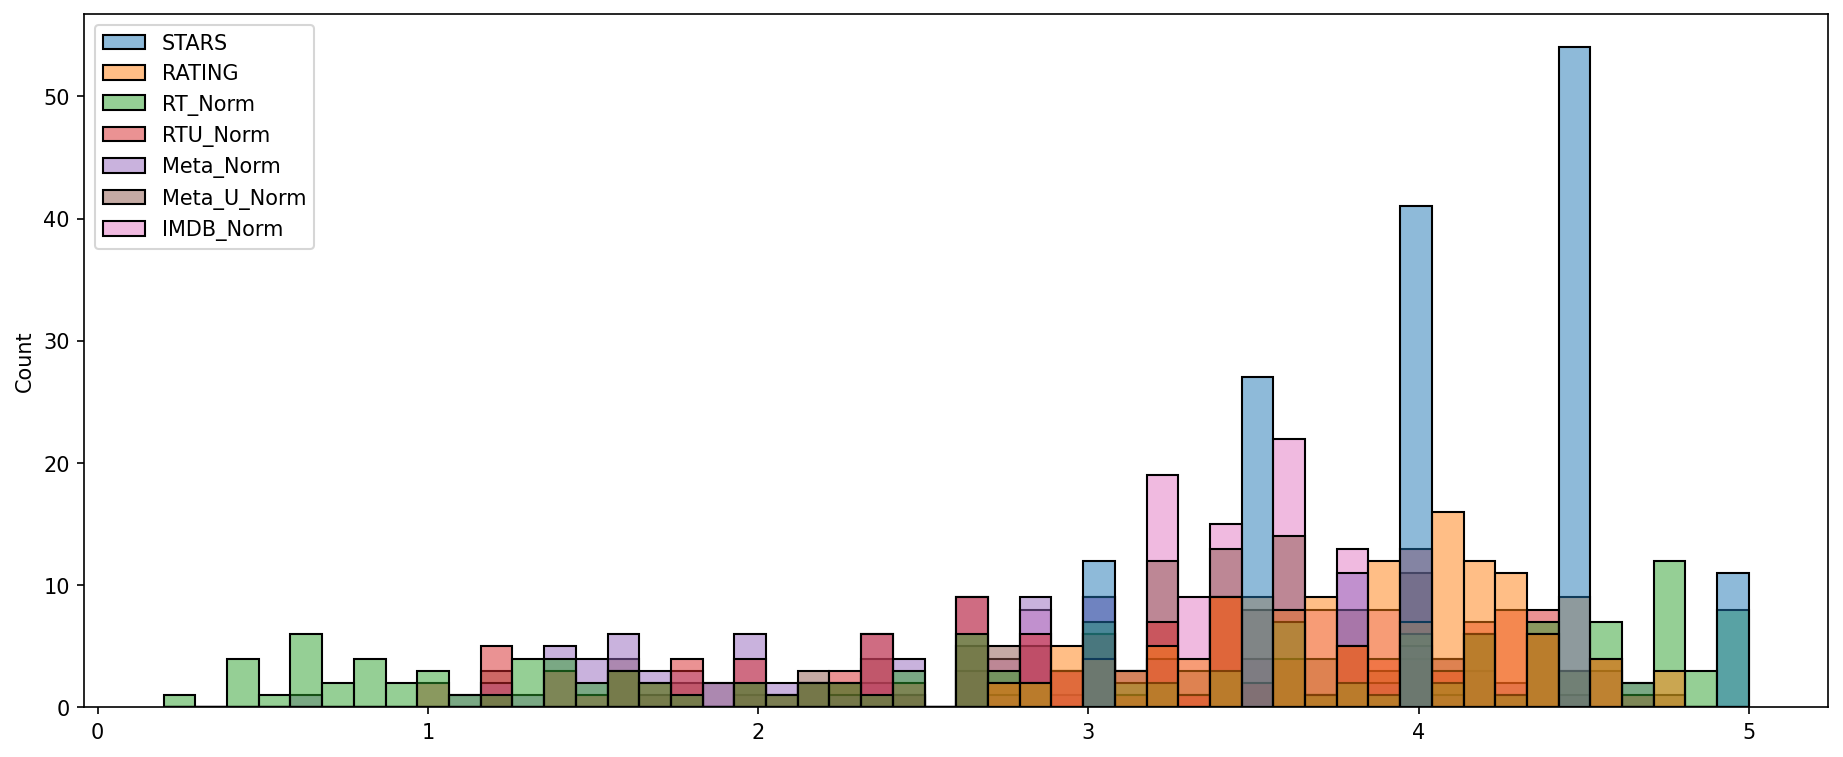

In [115]:
plt.subplots(figsize=(15,6),dpi=150)
ax=sns.histplot(combined_ratings_norm_data,bins=50)
sns.move_legend(ax, "upper left")

if we are to find out How the worst movies are rated across all platforms, we can Create a clustermap visualization of all normalized scores. Note the differences in ratings, highly rated movies should be clustered together versus poorly rated movies.

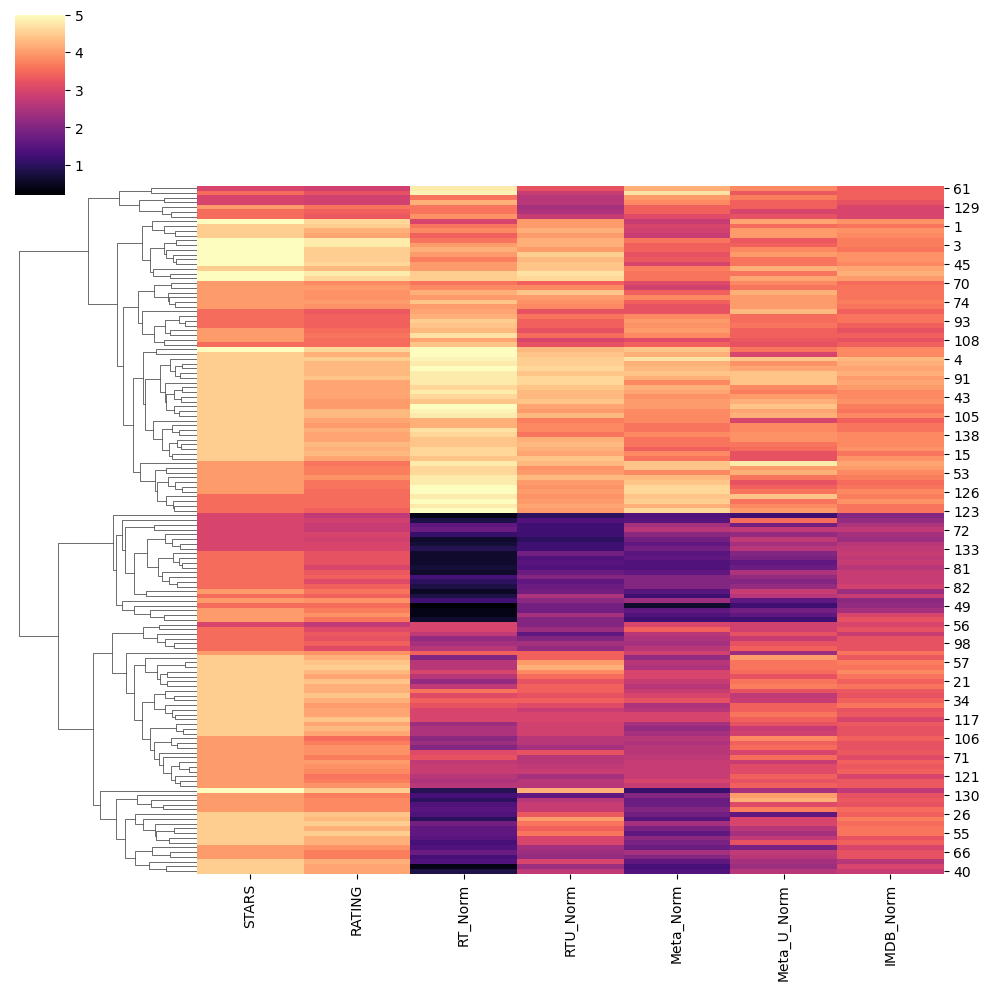

In [117]:
sns.clustermap(combined_ratings_norm_data,cmap='magma',col_cluster=False)

Clearly Fandango has an uneven distribution as can be seen from the stars and rathing which are from the Fandango data. from the clusterplot we notice that on the same movies, other platform have worst movies by ratings clusterd together (the dark region on the middle-lower part of the plot) but fandango seems to have no bad ratings for those movies. We can also see that RT critics have the most uniform distribution. Let's directly compare these two. we can Create a KDE plot that compare the distribution of RT critic ratings against the STARS displayed by Fandango.

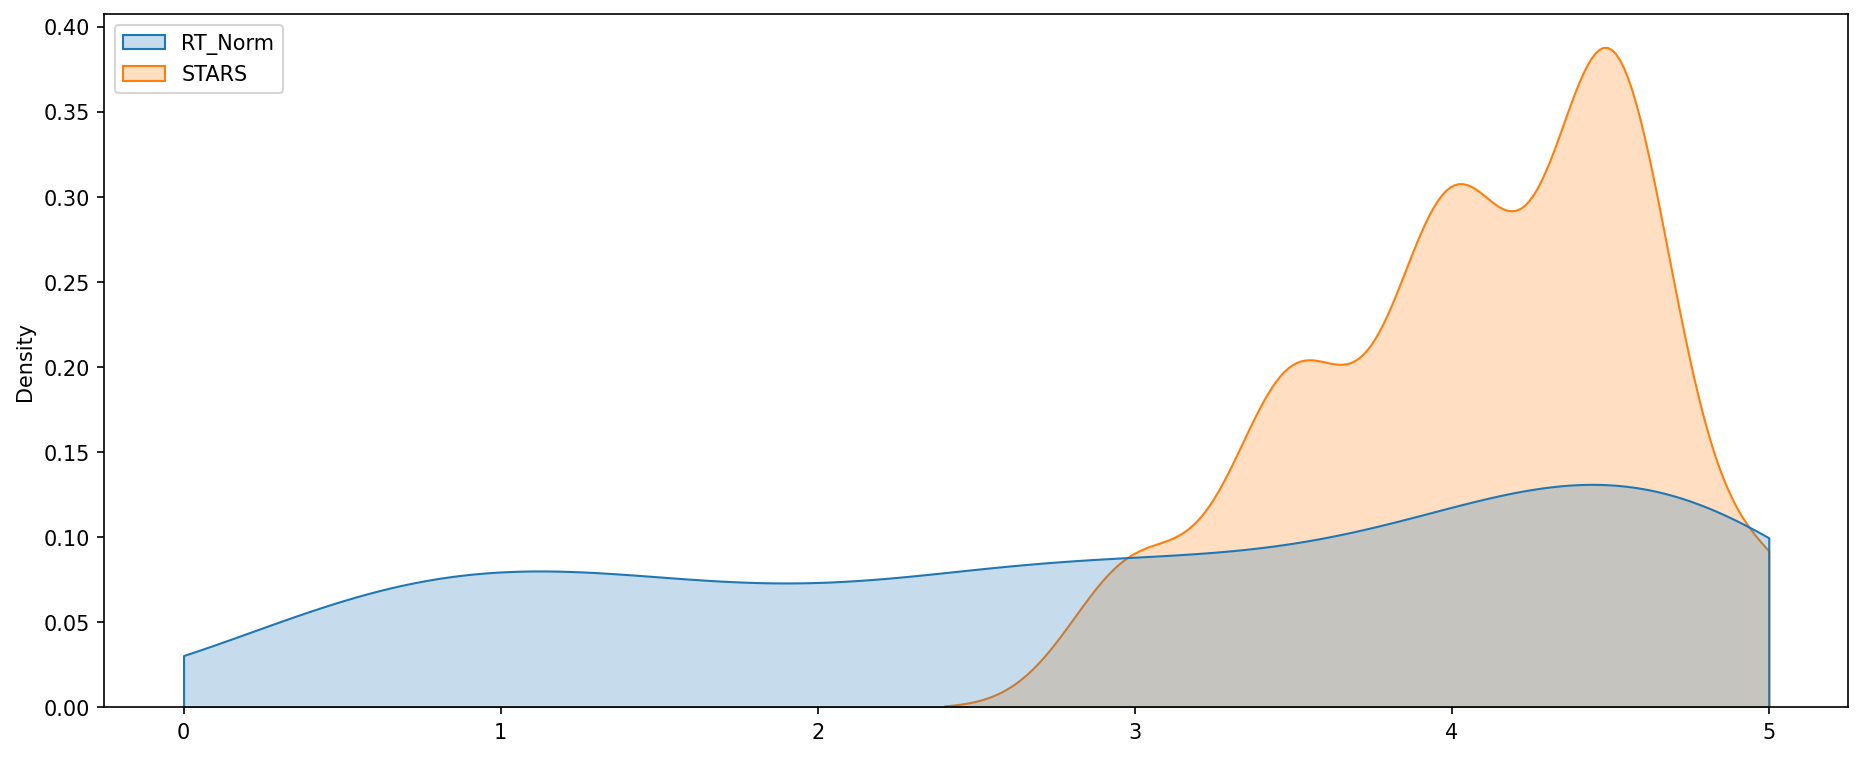

In [106]:
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
ax=sns.kdeplot(data=combined_ratings_norm_data[['RT_Norm','STARS']],clip=[0,5],fill=True)
sns.move_legend(ax, "upper left")

 Clearly Fandango is rating movies much higher than other sites, especially considering that it is then displaying a rounded up version of the rating. Let's examine the top 10 worst movies. Based off the Rotten Tomatoes Critic Ratings (since they have kind of the harsest ratings as we see from the cluster plot), what are the top 10 lowest rated movies? What are the normalized scores across all platforms for these movies? 

In [123]:
combined_ratings_norm_data.nsmallest(10,'RT_Norm')

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
77,3.5,3.2,0.6,1.8,1.5,2.0,2.8,Seventh Son (2015)
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)


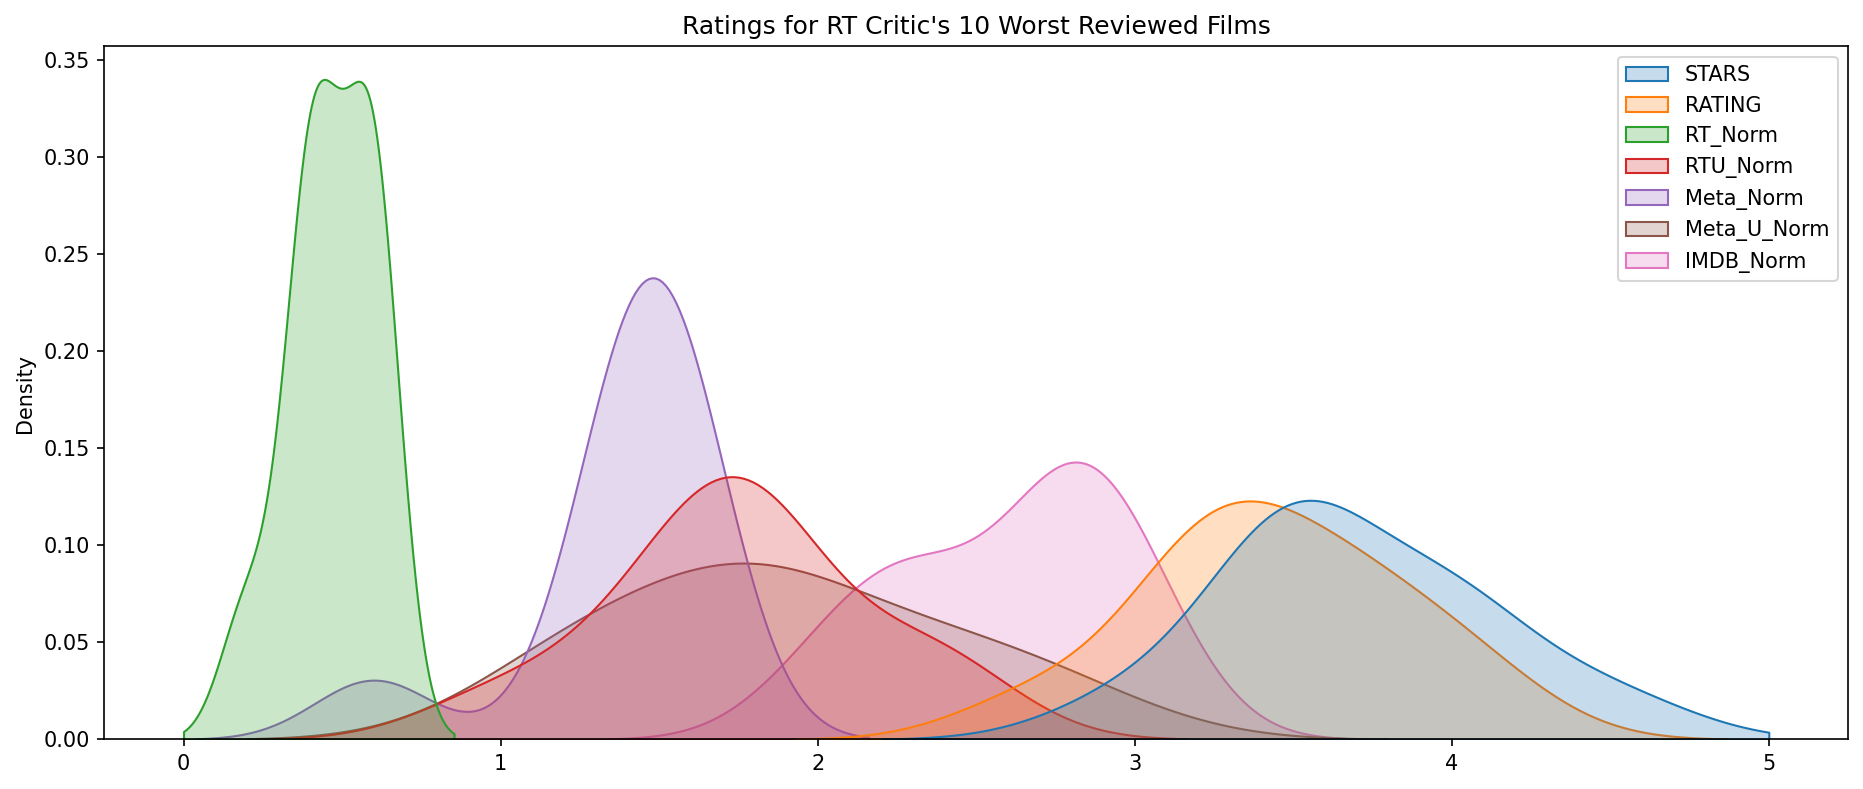

In [125]:
plt.figure(figsize=(15,6),dpi=150)
worst_films = combined_ratings_norm_data.nsmallest(10,'RT_Norm').drop('FILM',axis=1)
sns.kdeplot(data=worst_films,clip=[0,5],fill=True)
plt.title("Ratings for RT Critic's 10 Worst Reviewed Films");

In [127]:
combined_ratings_norm_data.describe()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,4.086207,3.841379,3.033103,3.180690,2.942759,3.253793,3.369655
std,0.541169,0.502437,1.509095,0.996542,0.977365,0.763128,0.477744
min,3.000000,2.700000,0.200000,1.000000,0.600000,1.200000,2.000000
25%,3.500000,3.500000,1.600000,2.500000,2.200000,2.800000,3.200000
50%,4.000000,3.900000,3.200000,3.300000,3.000000,3.400000,3.400000
75%,4.500000,4.200000,4.400000,4.000000,3.800000,3.800000,3.700000
max,5.000000,4.800000,5.000000,4.700000,4.700000,4.800000,4.300000


from the above, we notice on that the 10 least rated movies, fandango still has the highest distribution with over 3.5 on average ratings when other platforms have those movies way lower around 2 and even 1 for rotten tomatotes for example.

we can further examine this by analyzing specific movies from the 10 least rated to see just how much difference fandango has on its ratings in comparison to other platforms ratings

In [128]:
combined_ratings_norm_data.iloc[49]

STARS                                    3.5
RATING                                   3.5
RT_Norm                                  0.2
RTU_Norm                                 1.8
Meta_Norm                                0.6
Meta_U_Norm                              1.2
IMDB_Norm                                2.2
FILM           Paul Blart: Mall Cop 2 (2015)
Name: 49, dtype: object

for the above movie whie the average rating across other sites is very poor, we can see it has a 3.5 on fandango. 
you can say there is not much difference between IMDB 2.2 and fandango #>% but considering our scale is 5 a difference of 1.3 is very high. 


In [126]:
combined_ratings_norm_data.iloc[25]

STARS                     4.5
RATING                    4.1
RT_Norm                   0.4
RTU_Norm                  2.3
Meta_Norm                 1.3
Meta_U_Norm               2.3
IMDB_Norm                 3.0
FILM           Taken 3 (2015)
Name: 25, dtype: object

## FINAL ANALYSIS: Fandango is showing around 3-4 star ratings for films that are clearly bad! Notice the biggest offender, Taken 3!. Fandango is displaying 4.5 stars on their site for a film with an average rating of 1.86 across the other platforms!